# Go to the Previous Note book at [Colab Notebook](https://colab.research.google.com/drive/1AlQWyrO3g07vdyXt7ueS70OBbfAqWljm?pli=1&authuser=0#scrollTo=o37GdbMuE93e) to get more details and see its history

In [0]:
#@title Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as ml
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#@title CSV from url to pandas DataFrames { display-mode: "both" }

url='https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv'
data= pd.read_csv(url)
X_data=data.iloc[:,:-1]
y_data=data.iloc[:,-1]

 **Data is Imbalanced and will need to be either Undersampled or Oversampled**
 
[Imbalanced Data](https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2)

Good article about outliers [Outliers](https://heartbeat.fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07)

also see [this](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)





In [0]:
#@title a) Normalization using Min Max Scaler
min_max_scaler = preprocessing.MinMaxScaler()
column=list(data.columns.values)
data = pd.DataFrame(min_max_scaler.fit_transform(data),columns=column)
data.Class.astype(int)

In [0]:
#@title b) Normalizing data using Robust Scalar
transformer = preprocessing.RobustScaler().fit(data)
transformer
column=list(data.columns.values)
data = pd.DataFrame(transformer.transform(data),columns=column)
data.Class.astype(int)

In [49]:
#@title Fraud data { vertical-output: true }
fraud_idx = np.array(data[data.Class == 1].index)
fraud = data.iloc[fraud_idx,:]
#@markdown Number of Fraud are 
len(fraud)

492

In [50]:
#@title Good data { vertical-output: true }
good_idx = np.array(data[data.Class != 1].index)
good = data.iloc[good_idx,:]
#@markdown Number of Good are 
len(good)

284315

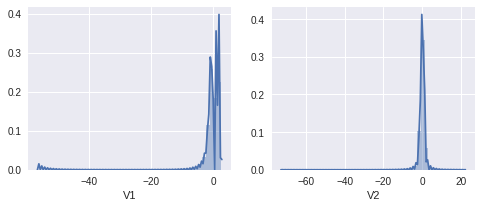

In [3]:
#@title Distrubution of the features { vertical-output: true }
f, axes = plt.subplots(ncols=2, figsize=(8,3))
sns.distributions.distplot(a=data.V1,ax=axes[0])
sns.distributions.distplot(a=data.V2,ax=axes[1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


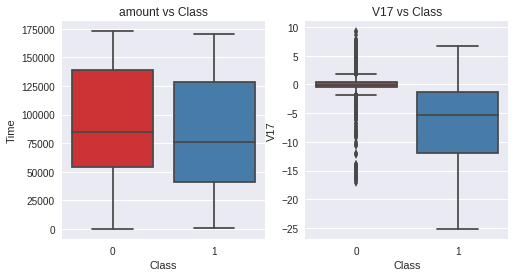

In [4]:
#@title Box plot to see the significance { vertical-output: true }
f, axes = plt.subplots(ncols=2, figsize=(8,4))

sns.boxplot(x="Class", y="Time", data=data, ax=axes[0],palette="Set1")
axes[0].set_title('amount vs Class')

sns.boxplot(x="Class", y="V17", data=data, ax=axes[1],palette="Set1")
axes[1].set_title('V17 vs Class')

plt.show()

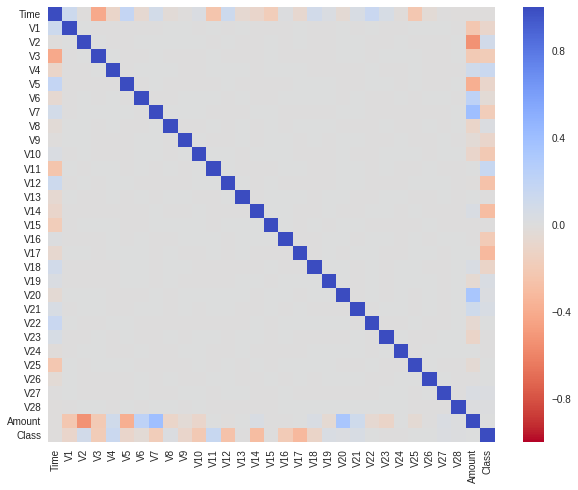

In [5]:
#@title Correlation of Features and Classes { vertical-output: true }
f, axes = plt.subplots(1,1, figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, cmap='coolwarm_r', annot_kws={'size':.1})
#@markdown Can see that Amount, Time and Features from V19 to V28 don't have any Correlation.

In [0]:
#@title Removing redundant features
data=data.drop(['Time','Amount','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'], axis=1) 
good=good.drop(['Time','Amount','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'], axis=1) 
fraud=fraud.drop(['Time','Amount','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'], axis=1) 

#@markdown removing all the unneccasary Features


In [0]:
#@title Undersampling to get a Balanced dataset (Function)
#@markdown Use the Function random_balanced_dataset() to access it
def random_balanced_data():
  fraud_df = data.loc[data['Class'] == 1]
  good_df = data.loc[data['Class'] == 0]
  sample_good_index=np.array(np.random.choice(good_df.index, len(fraud_df), replace = False))
  under_sample_idx = np.concatenate([fraud_df.index,sample_good_index])
  under_sample_data = data.iloc[under_sample_idx,:]
  under_sample_data= under_sample_data.sample(frac=1).reset_index(drop=True) # shuffle
  return under_sample_data

In [0]:
#@title Making Training and Test data (Function)
def shuffle_set():
  df=random_balanced_data()
  X=df.iloc[:,:-1]
  y=df.iloc[:,-1]
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=22)
  return X_train, X_test, y_train, y_test

# Autoencoder for the system
 
 
 Trying to follow [source](https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd)

In [7]:
#@title Importing Keras { vertical-output: true }

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
from keras import regularizers
import sklearn as ml

Using TensorFlow backend.


In [0]:
X_train, X_test, y_train, y_test=shuffle_set()


In [15]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
617,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,-2.516628,0.874052,-2.513104,0.021575,-3.565119,0.461153,-2.015713,-1.731413,-0.465815
49,-1.756712,3.266574,-4.153388,3.924526,-1.753772,-1.005787,-4.313217,1.560712,-3.295674,-6.213355,4.522992,-6.652844,-0.124685,-8.604486,0.110359,-5.945481,-9.338938,-2.390193
646,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,8.460244,-17.003289,0.101557,-14.094452,0.747031,-12.661696,-18.912494,-6.626975
40,-27.143678,15.365804,-28.407424,6.370895,-20.087878,-4.666313,-18.709479,17.903574,-3.722279,-8.120962,4.419943,-6.210941,1.063837,-5.843528,-0.108836,-5.606597,-11.756256,-4.714947
22,-0.521156,0.205919,2.201131,0.444069,-0.252112,0.343828,-0.197884,0.507216,0.322365,-0.538773,0.898237,0.571338,-1.157111,-0.093401,-0.866280,0.194912,-0.374129,0.111852


In [0]:
#@title Autoencoder model 
#@markdown Layer structure:       Input | 60 | 40 | 20 | 20 | 40 | 60 | Input 
#@markdown All activations are Relu activations
nnmodel = Sequential()
nnmodel.add(Dense(18,activation='sigmoid',input_shape=(np.shape(X_train)[1],)  ))
nnmodel.add(Dense(9,activation='sigmoid',activity_regularizer=regularizers.l1(10e-5),kernel_initializer='glorot_uniform',bias_initializer='zeros'))
nnmodel.add(Dense(4,activation='sigmoid',activity_regularizer=regularizers.l1(10e-5),kernel_initializer='glorot_uniform',bias_initializer='zeros'))
nnmodel.add(Dense(4,activation='relu',activity_regularizer=regularizers.l1(10e-5),kernel_initializer='glorot_uniform',bias_initializer='zeros'))
nnmodel.add(Dense(9,activation='relu',activity_regularizer=regularizers.l1(10e-5),kernel_initializer='glorot_uniform',bias_initializer='zeros'))
nnmodel.add(Dense(18,activation='relu',activity_regularizer=regularizers.l1(10e-5),kernel_initializer='glorot_uniform',bias_initializer='zeros'))
#nnmodel.add(Dense(np.shape(X)[1],activation='relu'))

In [0]:
#@title Fitting the model
nnmodel.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
nnmodel.fit(X_train, X_train, epochs=100, batch_size=64,shuffle=True,
                validation_data=(X_test, X_test))
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)

In [13]:
#@title Prediciton and results { vertical-output: true }
X_data=data.iloc[:,:-1]
y_data=data.iloc[:,-1]
nn_X_pred= nnmodel.predict(X_data)
mse = np.mean(np.power(X_data - nn_X_pred, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,284807.000000,197.000000
mean,1.462363,0.527919
std,6.674738,0.500492
min,0.114918,0.000000
25%,0.551610,0.000000
50%,0.875441,1.000000
75%,1.383983,1.000000
max,2180.341095,1.000000


In [14]:
error_df.head()

,reconstruction_error,true_class
0,0.781923,NaN
1,0.328671,1.0
2,1.628733,NaN
3,0.836808,NaN
4,0.503312,NaN


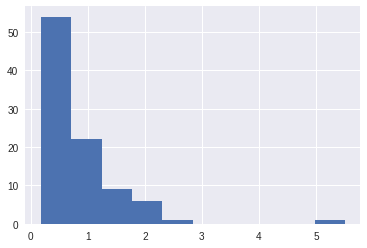

In [16]:
#@title Reconstruction of Good data { vertical-output: true }
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

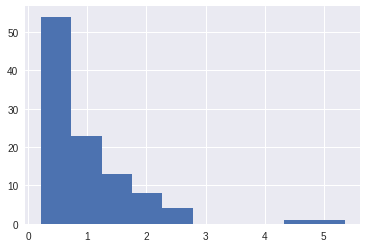

In [17]:
#@title Reconstruction of Fraud data { vertical-output: true }
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

# VAE for the data
look in the VAE section of this blog to know more [source](https://blog.keras.io/building-autoencoders-in-keras.html)

In [0]:
#@title Import libraries
from keras.layers import Lambda, Input, Dense
from keras import backend as K
from keras.losses import mse, binary_crossentropy
from keras.models import Model

In [0]:
#@title Intializing the network and making a Z mean and Z log sigma Variables
x = Input(shape=(18,))
h = Dense(36, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros')(x)
z_mean = Dense(2)(h)
z_log_sigma = Dense(2)(h)

In [0]:
#@title Making a sampling Function and a Lambda layer
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(2,))
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_sigma])

In [0]:
#@title Making a Decoder
decoder_h = Dense(36, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros')
decoder_mean = Dense(18, activation='sigmoid',kernel_initializer='glorot_uniform',bias_initializer='zeros')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)


In [0]:
#@title Making a VAE model and  a Generator model
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(2,))
h_decoded = decoder_h(decoder_input)
x_decoded_mean = decoder_mean(h_decoded)
generator = Model(decoder_input, x_decoded_mean)

In [0]:
#@title Loss function 
from keras.losses import mse, binary_crossentropy
def vae_loss(x, x_decoded_mean):
    xent_loss = mse(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='adamax', loss=vae_loss)

In [0]:
#@title Shuffle the dataset with new good values
X_train, X_test, y_train, y_test=shuffle_set()

In [0]:
#@title Fitting the model to the data
vae.fit(X_train, X_train,
        shuffle=True,
        epochs=100,
        batch_size=64,
        validation_data=(X_test, X_test))

In [0]:
#@title Training the model for differeent data sets
x=0
while(x<10):
  X_train, X_test, y_train, y_test=shuffle_set()
  vae.fit(X_train, X_train,
        shuffle=True,
        epochs=30,
        batch_size=64,
        validation_data=(X_test, X_test))
  x=x+1

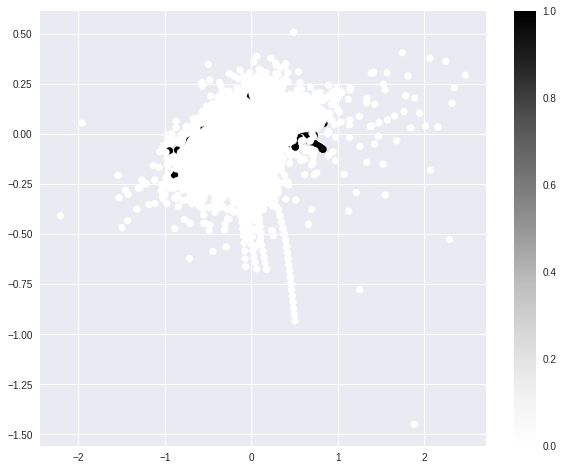

In [32]:
#@title plotting the distrubution of data { vertical-output: true }
X_test_encoded = encoder.predict(X_data, batch_size=64)
plt.figure(figsize=(10, 8))
plt.scatter(X_test_encoded[:, 0], X_test_encoded[:, 1], c=y_data)
plt.colorbar()
plt.show()